# Libraries

In [23]:
!pip install rouge_score
!pip install evaluate
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import math
import re
from collections import Counter


# Data

In [25]:
from datasets import list_datasets, load_dataset

# Print all the available datasets
ds = load_dataset('mlsum', 'es')
df_train = pd.DataFrame(ds["train"])
df_test = pd.DataFrame(ds["test"])
df_validation = pd.DataFrame(ds["validation"])

  0%|          | 0/3 [00:00<?, ?it/s]

In [26]:
print(df_train.shape)
print(df_validation.shape)
print(df_test.shape)

(266367, 6)
(10358, 6)
(13920, 6)


In [27]:
df_test["text"][1]

'Si no puede ver la retransmisión del desfile en directo a partir de las 12.00, pinche aquí. Sevilla acoge este sábado —con 40 grados a la sombra— el tradicional desfile de las Fuerzas Armadas, que estará presidido por los Reyes de España. En esta ocasión, por primera vez, contará con la asistencia de los familiares de los 173 militares fallecidos en las misiones en el exterior, invitados por la ministra de Defensa en funciones, Margarita Robles. El objetivo es conmemorar el 30º aniversario de la primera intervención de España en operaciones de paz en el extranjero, que tuvo lugar en Angola en 1989, bajo bandera de la ONU. Desde entonces, las Fuerzas Armadas españolas han participado en 87 misiones por todo el mundo, en las que han desplegado a 160.000 efectivos. Actualmente, las Fuerzas Armadas mantienen presencia en una veintena de misiones en el exterior, en las que participan 2.995 uniformados, entre militares y personal de las Fuerzas de Seguridad. La incorporación de las Fuerzas 

# EDA

In [28]:
# Number of documents per set

In [29]:
# Length of text
def text_length(df):
  df["words_text"] = df["text"].apply(lambda n: len(n.split()))
  df["words_summary"] = df["summary"].apply(lambda n: len(n.split()))
  df["summary_perc"] = df["words_summary"]/df["words_text"] 
  return df

df_train = text_length(df_train)
df_validation = text_length(df_validation)
df_test = text_length(df_test)

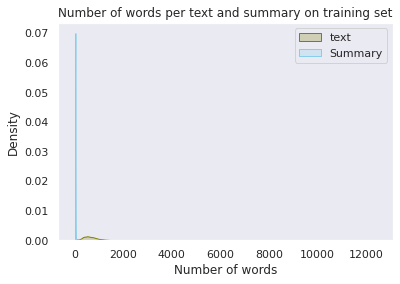

Average number of words in text: 697.7418861946112 and in summary: 19.25684112521446


In [30]:
# Plots
sns.set(style="darkgrid")
fig = sns.kdeplot(df_train['words_text'], shade=True, color="olive", label='text')
fig = sns.kdeplot(df_train['words_summary'], shade=True, color="skyblue", label='Summary')
plt.title("Number of words per text and summary on training set")
plt.legend()
plt.grid(False)
plt.xlabel("Number of words")
plt.show()
print("Average number of words in text: {} and in summary: {}".format(df_train['words_text'].mean(), df_train['words_summary'].mean()))

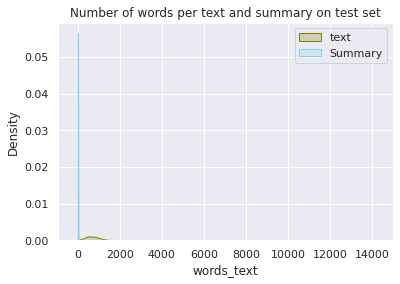

Average number of words in text: 783.925790229885 and in summary: 21.919827586206896


In [31]:
sns.set(style="darkgrid")
fig = sns.kdeplot(df_test['words_text'], shade=True, color="olive", label='text')
fig = sns.kdeplot(df_test['words_summary'], shade=True, color="skyblue", label='Summary')
plt.title("Number of words per text and summary on test set")
plt.legend()
plt.show()
print("Average number of words in text: {} and in summary: {}".format(df_test['words_text'].mean(), df_test['words_summary'].mean()))

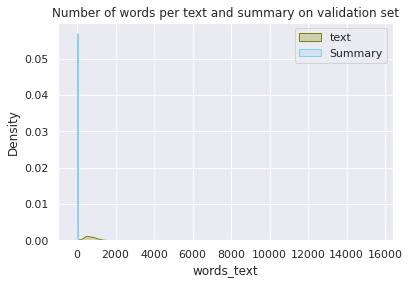

Average number of words in text: 746.9267233056574 and in summary: 21.67146167213748


In [32]:
sns.set(style="darkgrid")
fig = sns.kdeplot(df_validation['words_text'], shade=True, color="olive", label='text')
fig = sns.kdeplot(df_validation['words_summary'], shade=True, color="skyblue", label='Summary')
plt.title("Number of words per text and summary on validation set")
plt.legend()
plt.show()
print("Average number of words in text: {} and in summary: {}".format(df_validation['words_text'].mean(), df_validation['words_summary'].mean()))

In [33]:
# COSINE SIMILARITY
WORD = re.compile(r"\w+")

def get_cosine(vec1, vec2):
    vec1 = text_to_vector(vec1)
    vec2 = text_to_vector(vec2)
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])

    sum1 = sum([vec1[x] ** 2 for x in list(vec1.keys())])
    sum2 = sum([vec2[x] ** 2 for x in list(vec2.keys())])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)

    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator


def text_to_vector(text):
    words = WORD.findall(text)
    return Counter(words)

df_train["cosine_sim"] = np.nan
# for i in range(df_train.shape[0]):

#   df_train["cosine_sim"][i] = get_cosine(df_train["text"][i[], df_train["summary"]][i])
df_train["cosine_sim"] = df_train.apply(lambda x: get_cosine(x['text'], x['summary']), 
                        axis=1)


df_train["cosine_sim"].describe()

count    266367.000000
mean          0.435376
std           0.134394
min           0.000000
25%           0.344290
50%           0.442482
75%           0.532386
max           1.000000
Name: cosine_sim, dtype: float64

Text(0, 0.5, 'Number of news/texts')

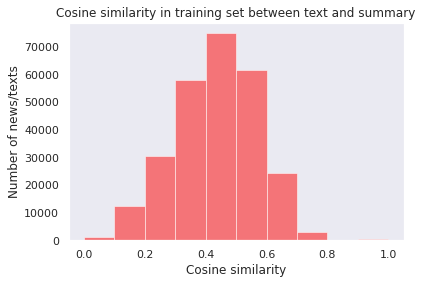

In [34]:
df_train["cosine_sim"].hist(alpha =0.5, color="red")
plt.title("Cosine similarity in training set between text and summary")
plt.grid(False)
plt.xlabel("Cosine similarity")
plt.ylabel("Number of news/texts")

# Baseline for models

In [35]:
import nltk

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [36]:
from nltk.tokenize import sent_tokenize
def three_sentence_summary(text):
    return "\n".join(sent_tokenize(text)[:3])


print(three_sentence_summary(df_test["text"][1]))

Si no puede ver la retransmisión del desfile en directo a partir de las 12.00, pinche aquí.
Sevilla acoge este sábado —con 40 grados a la sombra— el tradicional desfile de las Fuerzas Armadas, que estará presidido por los Reyes de España.
En esta ocasión, por primera vez, contará con la asistencia de los familiares de los 173 militares fallecidos en las misiones en el exterior, invitados por la ministra de Defensa en funciones, Margarita Robles.


In [37]:
def evaluate_baseline(dataset, metric):
    summaries = [three_sentence_summary(text) for text in dataset["text"]]
    return metric.compute(predictions=summaries, references=dataset["summary"])

In [38]:
import evaluate
rouge_score = evaluate.load("rouge")
score = evaluate_baseline(df_test, rouge_score)

In [39]:
df_test.text[1]

'Si no puede ver la retransmisión del desfile en directo a partir de las 12.00, pinche aquí. Sevilla acoge este sábado —con 40 grados a la sombra— el tradicional desfile de las Fuerzas Armadas, que estará presidido por los Reyes de España. En esta ocasión, por primera vez, contará con la asistencia de los familiares de los 173 militares fallecidos en las misiones en el exterior, invitados por la ministra de Defensa en funciones, Margarita Robles. El objetivo es conmemorar el 30º aniversario de la primera intervención de España en operaciones de paz en el extranjero, que tuvo lugar en Angola en 1989, bajo bandera de la ONU. Desde entonces, las Fuerzas Armadas españolas han participado en 87 misiones por todo el mundo, en las que han desplegado a 160.000 efectivos. Actualmente, las Fuerzas Armadas mantienen presencia en una veintena de misiones en el exterior, en las que participan 2.995 uniformados, entre militares y personal de las Fuerzas de Seguridad. La incorporación de las Fuerzas 

In [40]:
df_test.summary[1]

'Los Reyes presiden este sábado el desfile de las Fuerzas Armadas'

In [41]:
score

{'rouge1': 0.20760427609181464,
 'rouge2': 0.06962108961578081,
 'rougeL': 0.15008096572322738,
 'rougeLsum': 0.16845872071422827}